/home/andrew/Desktop/PASAE/PASEA-Dunlap-IAU_Internship
Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 139d31m24.765s or 20h42m30s: 139d31m24.765s
Enter the Declination(DEC) of Source in 00d00m00s formati.e -12d05m43.99s or +40h22m50s: -12d05m43.99s
Enter the Name of the source in string format, ie Hydra A,Polaris,cent_A: Hydra A
you have entered Right Ascension of 139d31m24.765s , Declination of -12d05m43.99s Frame set to ICRS
Enter the name of observatory 1 i.e Meerkat: Meerkat
['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', '

Select and enter time zone of Telescope or observatory No#1 i.e Africa/Johannesburg: Africa/Johannesburg
<Observer: name='Meerkat',
    location (lon, lat, el)=(21.44407 deg, -30.713692100000006 deg, 1049.9999999985284 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='ctio',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>
<Observer: name='Siding Spring Observatory',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000015516 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
<Observer: name='ASKAP',
    location (lon, lat, el)=(116.63699999999999 deg, -26.696000000000005 deg, 377.8299999988001 m),
    timezone=<DstTzInfo 'Australia/Perth' LMT+7:43:00 STD>>
Enter the START datetime of observation in date time format i.e 2020-11-13 07:00: 2020-11-17 07:00
Enter the END datetime of o

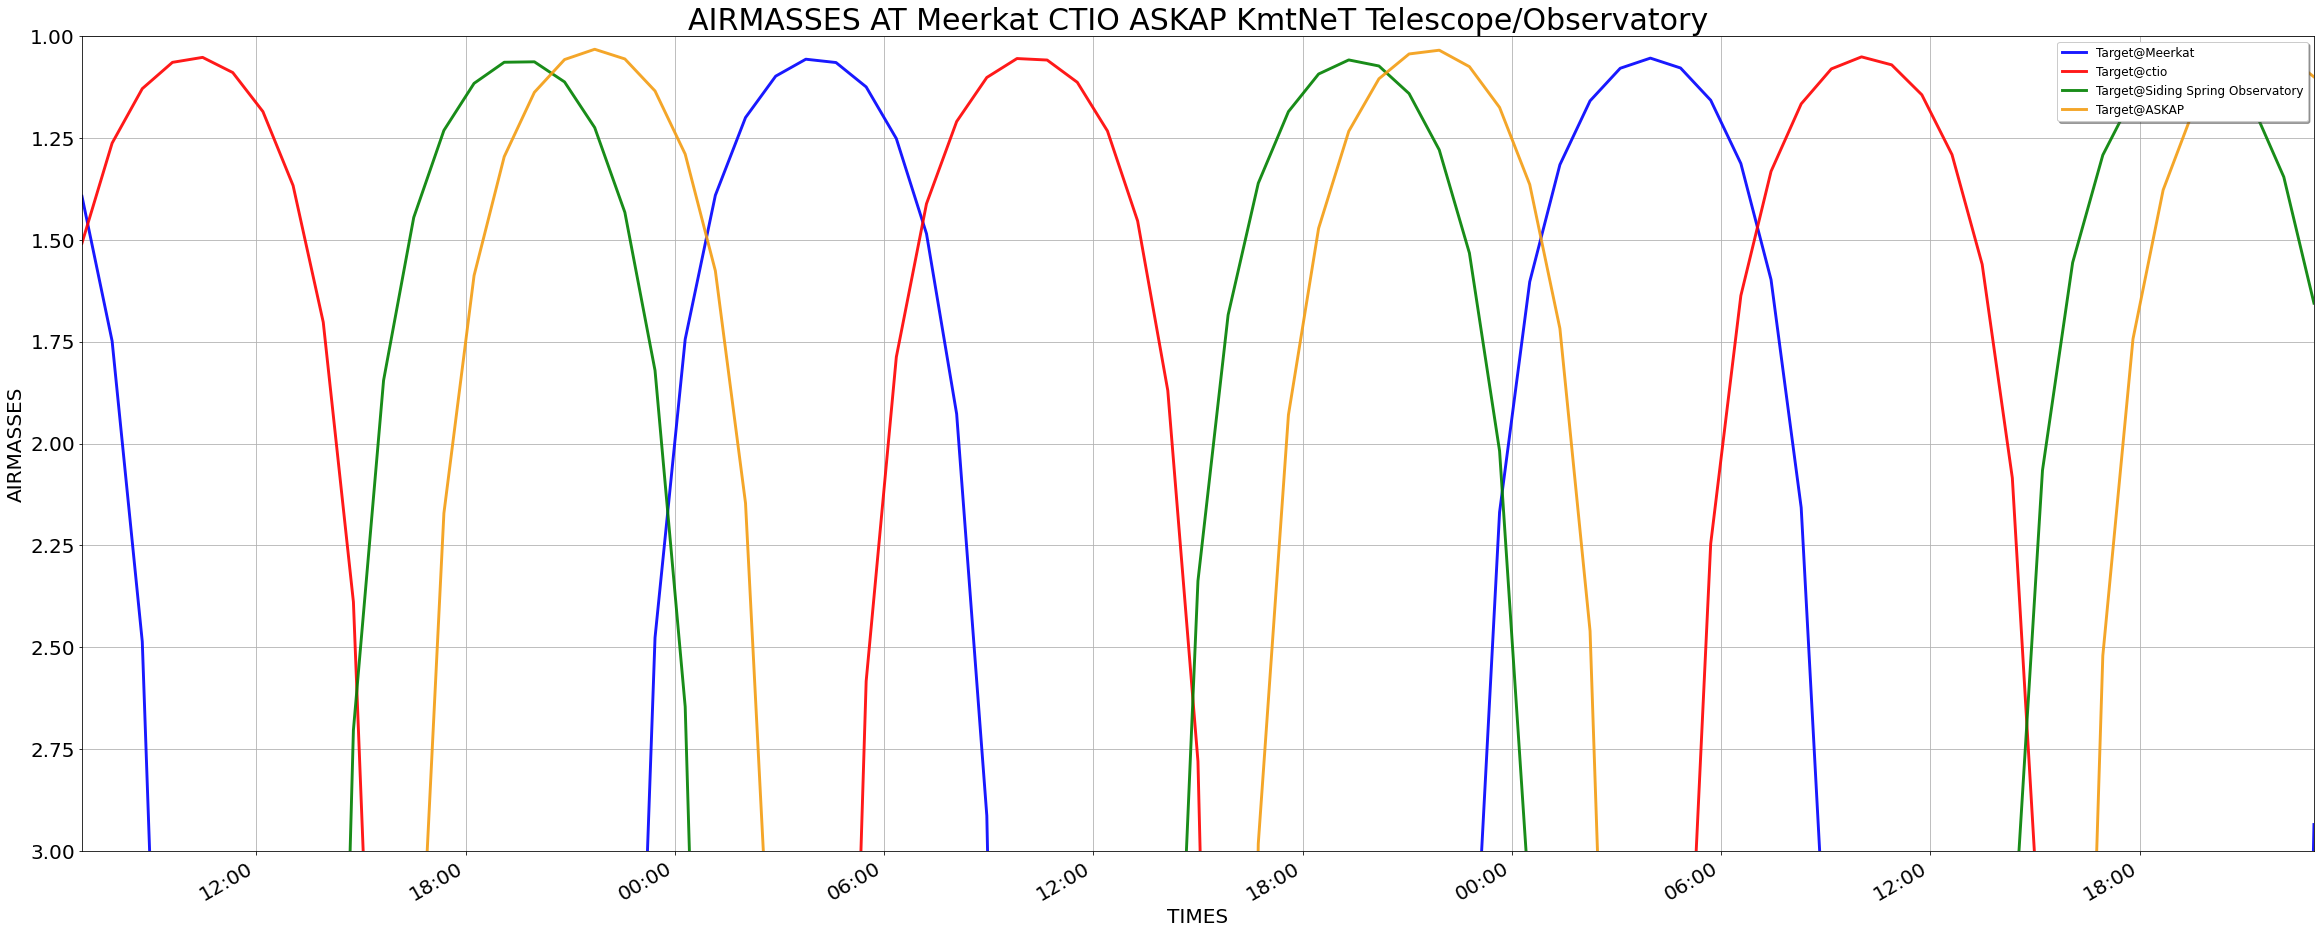

In [2]:

#!usr/bin/bash/env

#Plots Airmasses and visibility time ranges of a source at several Telescope locations
#Astroplan based

#Importing modules

from astropy.time import Time
from astroplan import download_IERS_A 
from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
from astroplan.plots import plot_airmass
import astropy.units as u
from astropy.coordinates import SkyCoord
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import common_timezones

#%matplotlib inline


#Check your working directory
cwd = os.getcwd() #get your work directory
print(cwd)

#Input information of source (RA and DEC)
ra=str(input("Enter the Right Ascenscion(RA) of Source in 00h00m00s formati.e 139d31m24.765s or 20h42m30s: "))
dec=str(input("Enter the Declination(DEC) of Source in 00d00m00s formati.e -12d05m43.99s or +40h22m50s: "))
source_name=str(input("Enter the Name of the source in string format, ie Hydra A,Polaris,cent_A: "))
print('you have entered Right Ascension of'+' '+ra,', Declination of' +' '+dec+' Frame set to ICRS')


target_coord = SkyCoord(ra, dec,  unit=(u.hourangle, u.deg))

target = FixedTarget(coord=target_coord, name=source_name)
#sirius = FixedTarget(coord=sirius_coord, name="Sirius")


#Set up observatories/telescopes

Observatory_name=str(input("Enter the name of observatory 1 i.e Meerkat: "))
latitude=-30.7136921
longitude=21.44407
elev=1050

print(common_timezones)

time_zone1=str(input("Select and enter time zone of Telescope or observatory No#1 i.e Africa/Johannesburg: "))


location = EarthLocation.from_geodetic(longitude*u.deg,latitude*u.deg,elev*u.m)
telescope= Observer(location=location, name=Observatory_name, timezone=time_zone1)
print(telescope)


ctio = Observer.at_site("ctio", timezone = 'America/Santiago')
print(ctio)

kmtnet = Observer.at_site("Siding Spring Observatory", timezone = 'Australia/Sydney')
print(kmtnet)


location_askap = EarthLocation.from_geodetic(116.637*u.deg,-26.696*u.deg,377.83*u.m)
askap = Observer(location=location_askap, name="ASKAP", timezone='Australia/Perth')
print(askap)





hydraA2=FixedTarget.from_name("Hydra_A", name='Target@'+ctio.name+'')  
hydraA3=FixedTarget.from_name("Hydra_A", name='Target@'+kmtnet.name+'')
hydraA4=FixedTarget.from_name("Hydra_A", name='Target@'+telescope.name+'')
hydraA5=FixedTarget.from_name("Hydra_A", name='Target@'+askap.name+'')



#Input observation dates 
start_time=str(input("Enter the START datetime of observation in date time format i.e 2020-11-13 07:00: "))
end_time=str(input("Enter the END datetime of observation in date time format i.e 2020-11-15 19:00: "))

#start_time=Time('2020-11-13 07:00')
#end_time=Time('2020-11-15 19:00')

start=Time(start_time)
end= Time(end_time)
start_date = Time(start)
end_date= Time(end)
delta_t = end_date - start_date
date_range= start_date + delta_t*np.linspace(0, 1,75)



#plot airmasses and observation times

plt.figure(figsize=(40,15)) #

#plot styles

observatory1_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }  
ctio_styles = {'linestyle': '-', 'color': 'r', 'alpha': 0.9, 'linewidth': 2.9 } #lINES STYLES 
kmtnet_styles = {'linestyle': '-', 'color': 'g', 'alpha': 0.9, 'linewidth': 2.9 } 
#meerkat_styles = {'linestyle': '-', 'color': 'b', 'alpha': 0.9, 'linewidth': 2.9 }    
askap_styles = {'linestyle': '-', 'color': '#F39C12', 'alpha': 0.9, 'linewidth': 2.9 }    
  

#Plotting airmasses 
plot_airmass(hydraA4, telescope, date_range, style_kwargs=observatory1_styles)

plot_airmass(hydraA2, ctio,date_range,  style_kwargs=ctio_styles)

plot_airmass(hydraA3, kmtnet, date_range,  style_kwargs=kmtnet_styles)

plot_airmass(hydraA5, askap,date_range,style_kwargs=askap_styles)
  
    
plt.title('AIRMASSES AT' +' '+ Observatory_name + ' '+ ctio.name.upper()+ ' '+ askap.name+ ' '+'KmtNeT Telescope/Observatory',fontsize=30)
plt.xlabel('TIMES',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('AIRMASSES',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(shadow=True, loc=1, prop={'size': 20})
plt.grid()
plt.savefig('AIRMASSES AT' +' '+ Observatory_name.upper() + ' '+ ctio.name.upper()+ ' '+ askap.name+ ' '+'KMTNeT Telescope.png',dpi=300)
plt.show()


#139d31m24.765s -12d05m43.99s